In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
datetime_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
data = pd.read_table(
    'dog_rates_tweets.csv', 
    sep=',',  
    index_col=0, 
    header=1,
    names=['id', 'created_at', 'text'], 
    parse_dates=['created_at'],
    date_parser=datetime_parser
)


In [4]:
data['rating'] = data['text'].str.extract(r'(\d+(?:\.\d+)?)/10', expand=True).astype(float)

In [5]:
data = data[data['rating'].notnull() & (data['rating'] <= 20)]

In [6]:
def to_timestamp(input):
    return input.timestamp()

data['timestamp'] = data['created_at'].apply(to_timestamp)

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['timestamp'], data['rating'])

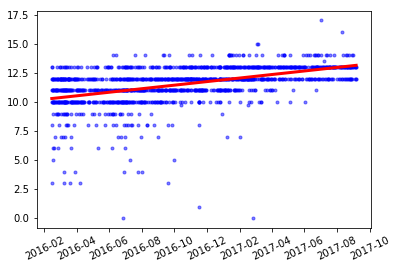

In [8]:
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['timestamp']*slope + intercept, 'r-', linewidth=3)
plt.xticks(rotation=25)
plt.show()